In [1]:
pip install tensorflow 

  Using cached tensorflow-2.8.0-cp38-cp38-win_amd64.whl (438.0 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Processing c:\users\asus\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501\termcolor-1.1.0-py3-none-any.whl
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached typing_extensions-4.2.0-py3-none-any.whl (24 kB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached protobuf-3.20.1-cp38-cp38-win_amd64.whl (904 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached libclang-14.0.1-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached tensorflow_io_gcs_filesystem-0.25.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached tf_estimator_nigh

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25862 sha256=6b20b6901afedf03477bddff3ab9ec4b82047616d4f3bf153a7a631010e9330b
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install argparse

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


ImageDataGenerator: It allows to augment images in real-time while the model is still training. It makes the model robust and saves up memory.

MobileNetV2: It is a general architecture that can be used for multiple use cases. It can use different input layer size and different width factors allowing different width models to reduce the number of multiply-adds and thereby reduce inference cost on mobile devices. It uses inverted residual blocks with bottlenecking features.

AveragePooling2D: The image dimension is divided into small matrix where the matrix is shifted step by step side by side i.e. striding and taking the average from that input box is average pooling.

Dropout: Since a data is never clean and needs some preprocessing.Same like when an image is taken as input and image processing is performed the droput layer helps in removing the noise from that layer when found.

Flatten: It helps to flat the image. When flatten is applied to inpt shape the shape of the image is reduced i.e. (2,2) becomes 4 after applying flatten.

Dense: It is usually used for changing the dimension. It receives input from all neurons where it performs matrix multiplication. The values used for matrix mulitpliction are those paramters that canbe trained and updated duting back propagation.

Input: This layer contains the image data which needs to be processed to train a model for further image classification.

Model: It gorup layers into an object with training.

Adam: Adam is used to update weights iteratively during training data. It is used as it maintains a per-parameter learning rate and improves performance with sparse gardient.

preprocess_input: This function returns a Keras image classification model.

img_to_array: It converts a loaded image into PIL format into NumPy array

load_img: It loads an image into PIL format.

to_categorical: It allows a numpy array which has integers of different categories to convert into a matrix that has binary values.

LabelBinarizer: It converts multi-class to binary class labels. It uses inverse_transform method during prediction time one can assign the class for which model gave the greatest confidence.

Numpy: It stands for numerical python. Numpy is one of the Python library used for working with arrays. It is written in three programming languages that are Python, C, C++. Numpy is used for calculating multi-dimensional array.

Matplotlib: It is a comprehensive library for creating static, animated, and interactive visualizations in Python. It makes possible to do hard things like creates a publication quality plots with just a few lines of code, interactive figures that zoom, update. Allows customizing the line styles, font properties, axes properties. matplotlib.pyplot: It is a collection of functions that make Matplotlib work like MATLAB. Each pyplot function makes changes to a figure: e.g. creates a figure, plots area in a figure, and plots some lines in a plotting area.

os: It helps to manipulate paths.


## Importing libraries 

In [1]:
#importing all the necessary libraries 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

Intialising the learning rates, Number of epoch for the number of times to train the model for and batch size that decides the size of batches of data
The learning rate for the model is set as 0.0001 as small learning rate gives better results and performance of the model is also affected

In [2]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

Path for the image dataset where the images folder are saved in the DIRECTORY variable and the two categories with_mask and without_mask in CATEGORIES.

In [3]:
DIRECTORY = r"C:\Users\Asus\Desktop\noteebook\dataset"
CATEGORIES = ["with_mask", "without_mask"]

Firstly, the empty list data and labels are intialized where the array of images formed are appened in the data list and in the labels list all the corresponding with_mask and without_mask will be stored.

The loop is ran for two categories with_mask and without_mask. First it loops through with_mask and second without_mask.An once all the images of both cateogries is figured. Then the os.listdir collects all the images to the particular directory then the path of with_mask is joined to corresponding img. 
Once the path is joined image is loaded and the target so given 224,224 is nothing but basically width and height of the image to maintain uniformity in all the stored images.
Then the image is stored in image variable and that image is converted to array. Then after the conversion the image is sent to preprocess_input to use mobile net for the model.

After the model is preporcessed the image array is appended in the data list and again the images array are seaparated into two categories in the labels list.Now the data is in numerical values.

In [4]:
print("[INFO] loading images...")

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image = load_img(img_path, target_size=(224,224))
        image = img_to_array(image)
        image = preprocess_input(image)
        
        data.append(image)
        labels.append(category)

[INFO] loading images...


C:\Users\Asus\miniconda3\lib\site-packages\PIL\Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Since the above loop has only converted data into integer but still the labels i.e. with_mask and without_mask are still categorical so one-hot encoding is peformed on the labels. 
After conversion of the labels into 0 and 1 then the data list  and labels list is shifted to numpy array

Then the model is splitted into train and test where data is the input and label is the output and test size is set as 20% and stratify is used in the label and random state is set to 42 which determines out train and test size.

In [5]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data,dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)


Construction of image generator for data augmentation.
The convolution part is swapped with mobile net and the image array is sent to it and max pooling is performed where the images are flatten and fully connected in a layer to give an output whether it a person wearing mask or without mask. 

Mobile Net is faster then CNN and also it use less parameters than CNN. It might be less accurate than CNN but can be used for developing the model we are looking for in this case.

The image is generated using various properties.It creates many image from a single image using their own properties 

In [6]:
aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,fill_mode="nearest")

Since Mobile net is being used the the model is divided into two models head model and base model. 
imagenet is used in the weights section for better results of image.The default for include_top is true but it is set to false because we are not using the fully connected layer now and the input_tensor contains the height, width the the three channels of the image i.e. RGB

In [7]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))


The head model is prepared first where max pooling is set as (7,7) then the image is flatten after max pooling and in the dense layer relu is taken as activation function. Relu is taken as activation function as it is good fro non linear data and mosr preferred when it comes to image.
Use of dropout helps the model from overfitiing as well as reduces noise from data.
The other headmodel is for the output where two categories are there so the dense layer is set to 2 with the activation function as softmax.

In [8]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


Here Model is function is called which takes two parameters as input base model which denotes our inputs and head model which denotes our output. 

In [9]:
model = Model(inputs=baseModel.input, outputs=headModel)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

Here the basemodel is freezed to prevent their values from being updated in the first training process

Then optimization algorithm is applied on the model.
The model is compiled with the loss function is tracked by binary crossentropy and model optimized by Adam and model performance traced by accuracy.

In [10]:
for layer in baseModel.layers:
    layer.trainable = False
    
    print("[INFO] compiling model...")
    opt= Adam(lr=INIT_LR, decay=INIT_LR/EPOCHS)
    model.compile(loss = "binary_crossentropy", optimizer=opt,metrics=["accuracy"])

[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...


C:\Users\Asus\miniconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compiling model...
[INFO] compi

Now the model is fitted with the number of training inputs and outputs where epoch is ran on the train sets, also validation set is done on the testX and testY. Epoch notes the forward and backward movement of training.

In [11]:
print("[INFO] training head...")
H = model.fit(aug.flow(trainX, trainY, batch_size=BS),steps_per_epoch=len(trainX) // BS,validation_data=(testX, testY),validation_steps=len(testX) // BS,epochs=EPOCHS)

[INFO] training head...
Epoch 1/20
95/95 [==============================] - 141s 1s/step - loss: 0.4114 - accuracy: 0.8461 - val_loss: 0.1577 - val_accuracy: 0.9804
Epoch 2/20
95/95 [==============================] - 142s 2s/step - loss: 0.1579 - accuracy: 0.9624 - val_loss: 0.0796 - val_accuracy: 0.9883
Epoch 3/20
95/95 [==============================] - 128s 1s/step - loss: 0.1082 - accuracy: 0.9710 - val_loss: 0.0565 - val_accuracy: 0.9909
Epoch 4/20
95/95 [==============================] - 123s 1s/step - loss: 0.0834 - accuracy: 0.9779 - val_loss: 0.0464 - val_accuracy: 0.9909
Epoch 5/20
95/95 [==============================] - 125s 1s/step - loss: 0.0707 - accuracy: 0.9815 - val_loss: 0.0401 - val_accuracy: 0.9922
Epoch 6/20
95/95 [==============================] - 124s 1s/step - loss: 0.0649 - accuracy: 0.9842 - val_loss: 0.0368 - val_accuracy: 0.9909
Epoch 7/20
95/95 [==============================] - 117s 1s/step - loss: 0.0510 - accuracy: 0.9862 - val_loss: 0.0336 - val_accura

Making prediction on the testing set 

In [12]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

[INFO] evaluating network...


For each image in the testing set we need to find the index of th label corresponding to the largest predicted probability so the below code is created to note that

In [13]:
predIdxs = np.argmax(predIdxs, axis=1)

Then a classification report of detail table of precison, reacall, f1-score, support with macro avgerage,accuracy, weighted avgerage is formed 

In [14]:
print(classification_report(testY.argmax(axis=1), predIdxs,target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.98      1.00      0.99       383
without_mask       1.00      0.98      0.99       384

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767



Now the model is saved in the h5 format

In [15]:
print("[INFO] saving mask detector model...")
model.save("mask_detector.model", save_format="h5")

[INFO] saving mask detector model...


Finally the training loss and the validation loss is plotted in a graph with the help of matplotlib library which was noted during the model fitting in each epoch and the model shows a drastic loss in each epoch in both the validation as well as training process.

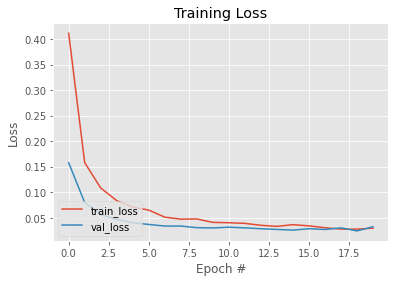

In [16]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("plot.png")

Finally the model accuracy is also plotted on the graph for both the training and validation during the fitting stage and both the process shows drastic improvement in the perfomance with increase in accuracy.

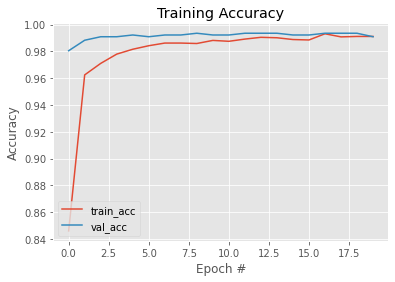

In [17]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")